<a href="https://colab.research.google.com/github/s-k-sharma/CS208/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import io
data = pd.read_csv('AMZN-DUK-KO.csv')

In [3]:
print(data.head(2))
print("The shape of sample data = ", data.shape)

         Date       AMZN        DUK         KO
0  03-01-2007  38.700001  34.971017  17.874906
1  04-01-2007  38.900002  35.044103  17.882263
The shape of sample data =  (2519, 4)


In [4]:
Date = data['Date']
# Droping data parameter
f_data = data.drop("Date",axis=1)
print(f_data.shape)

(2519, 3)


In [5]:
# standrizing the data
import numpy
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(f_data)
print(standardized_data.shape)

(2519, 3)


In [6]:
#find the co-variance matrix which is
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = numpy.cov(standardized_data.T)
print(covar_matrix)
print ( "The shape of variance matrix = ", covar_matrix.shape)


[[1.00039714 0.89210261 0.88585829]
 [0.89210261 1.00039714 0.97559994]
 [0.88585829 0.97559994 1.00039714]]
The shape of variance matrix =  (3, 3)


In [7]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 
# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (1 and 2) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(1,2))
allvalues, allvectors = eigh(covar_matrix)
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (3, 2)
Updated shape of eigen vectors =  (2, 3)


In [8]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 3) X (3, 2519)  =  (2, 2519)


In [9]:
import pandas as pd
new_coordinates = np.vstack(new_coordinates).T
# creating a new data frame for ploting 
dataframe = pd.DataFrame(data=new_coordinates,columns=("1st", "2nd"))
print(dataframe.head())

        1st       2nd
0  0.056178  2.024540
1  0.054887  2.020753
2  0.078214  2.060750
3  0.067575  2.053261
4  0.071927  2.057544


Covarience 99.1776748178109 %


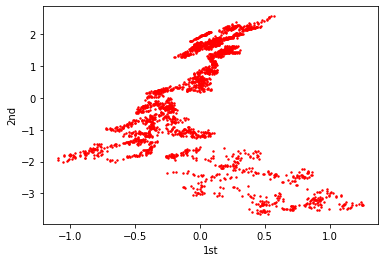

In [10]:
import matplotlib.pyplot as plt
ax1 = dataframe.plot.scatter(x='1st',y='2nd',s=2,c='red')
print("Covarience",(sum(values)/sum(allvalues))*100,"%")
plt.show()

## Using Correlation 

In [12]:
# Geeting correlation matrix
corr = pd.DataFrame.corr(f_data)
print(corr)

          AMZN       DUK        KO
AMZN  1.000000  0.891748  0.885507
DUK   0.891748  1.000000  0.975213
KO    0.885507  0.975213  1.000000


In [13]:
from scipy.linalg import eigh 
values, vectors = eigh(corr)
print("Shape of eigen vectors = ",vectors.shape)
print("Updated shape of eigen vectors = ",vectors.shape)
print(values,"\n",vectors)
sum_eign=sum(values)

Shape of eigen vectors =  (3, 3)
Updated shape of eigen vectors =  (3, 3)
[0.02466976 0.13973145 2.83559879] 
 [[ 0.02663121  0.82471456 -0.56492184]
 [-0.71888449 -0.37688389 -0.58409213]
 [ 0.69461922 -0.42166863 -0.58283763]]


In [14]:
# I tool two feature and possible all combinations and ploting the graph
values1, vectors1 = eigh(covar_matrix, eigvals=(0,1))
values2, vectors2 = eigh(covar_matrix, eigvals=(1,2))
values3, vectors3= eigh(covar_matrix)
values3=np.delete(values3,1,axis=0)
vectors3=np.delete(vectors3,1,axis=1)
#print(vectors3)
#print(values1,values2,values3)
vectors1=vectors1.T
vectors2=vectors2.T
vectors3=vectors3.T

In [15]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates1 = np.matmul(vectors1, sample_data.T)
new_coordinates2 = np.matmul(vectors2, sample_data.T)
new_coordinates3 = np.matmul(vectors3, sample_data.T)

print (" resultanat new data points' shape 1", vectors1.shape, "X", sample_data.T.shape," = ", new_coordinates1.shape)
print (" resultanat new data points' shape 2", vectors2.shape, "X", sample_data.T.shape," = ", new_coordinates2.shape)
print (" resultanat new data points' shape 3", vectors3.shape, "X", sample_data.T.shape," = ", new_coordinates3.shape)

 resultanat new data points' shape 1 (2, 3) X (3, 2519)  =  (2, 2519)
 resultanat new data points' shape 2 (2, 3) X (3, 2519)  =  (2, 2519)
 resultanat new data points' shape 3 (2, 3) X (3, 2519)  =  (2, 2519)


In [16]:
import pandas as pd
new_coordinates1 = np.vstack(new_coordinates1).T
# creating a new data frame for ploting 
dataframe1 = pd.DataFrame(data=new_coordinates1,columns=("1st", "2nd"))
print(dataframe1.head())
new_coordinates2 = np.vstack(new_coordinates2).T
dataframe2 = pd.DataFrame(data=new_coordinates2,columns=("1st", "2nd"))
print(dataframe2.head())
new_coordinates3 = np.vstack(new_coordinates3).T
dataframe3 = pd.DataFrame(data=new_coordinates3,columns=("1st", "2nd"))
print(dataframe3.head())

        1st       2nd
0 -0.291739  0.056178
1 -0.294439  0.054887
2 -0.268174  0.078214
3 -0.261352  0.067575
4 -0.252592  0.071927
        1st       2nd
0  0.056178  2.024540
1  0.054887  2.020753
2  0.078214  2.060750
3  0.067575  2.053261
4  0.071927  2.057544
        1st       2nd
0 -0.291739 -2.024540
1 -0.294439 -2.020753
2 -0.268174 -2.060750
3 -0.261352 -2.053261
4 -0.252592 -2.057544


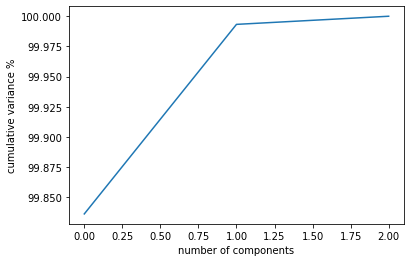

In [13]:
from sklearn.decomposition import PCA
pca = PCA().fit(f_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative variance %');

Covarience 5.4822165940678795 %


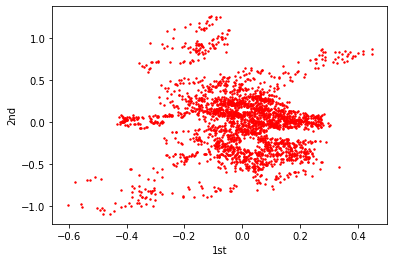

Covarience 99.21706229788153 %


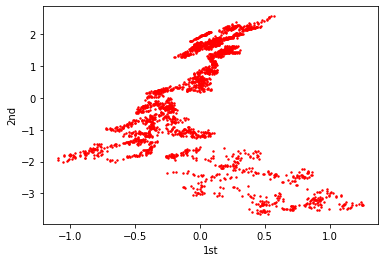

Covarience 95.38014922560423 %


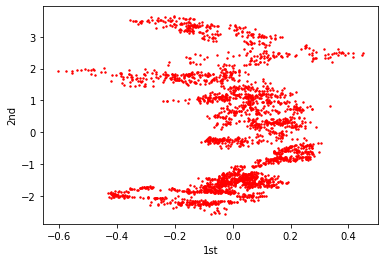

In [17]:
import matplotlib.pyplot as plt
ax1 = dataframe1.plot.scatter(x='1st',y='2nd',s=2,c='red')
print("Covarience",(sum(values1)/sum_eign)*100,"%")
plt.show()
ax1 = dataframe2.plot.scatter(x='1st',y='2nd',s=2,c='red')
print("Covarience",(sum(values2)/sum_eign)*100,"%")
plt.show()
ax1 = dataframe3.plot.scatter(x='1st',y='2nd',s=2,c='red')
print("Covarience",(sum(values3)/sum_eign)*100,"%")
plt.show()